In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
from tqdm.notebook import tqdm

import cumsum_finder

In [2]:
%cd -q ../data
xls = pd.ExcelFile('Project 2_2022.xlsx')
df = pd.read_excel(xls, 'Data')
%cd -q ../notebooks

In [4]:
df.head()

,Date,Income,Outcome,Balance
0,2017-01-09 00:00:00.000,1.343028,1.487865,-0.155904
1,2017-01-10 00:00:00.000,1.068610,1.194182,-0.125572
2,2017-01-11 00:00:00.000,0.944429,0.936663,0.007767
3,2017-01-12 00:00:00.000,1.672202,0.875379,0.800391
4,2017-01-13 00:00:00.000,0.955924,0.975645,-0.019721


In [6]:
var = 1.
alpha = 0.05
beta = 0.005
mean_diff = 0.01

stat_trajectory = []

cusum = cumsum_finder.MeanExp(alpha, beta, mean_diff, trsh=0.03)
for k, x_k in tqdm(enumerate(df['Balance'].values)):
    cusum.update(x_k)
    cusum.count_metric()
    stat_trajectory.append(cusum.metric)

0it [00:00, ?it/s]

<AxesSubplot:>

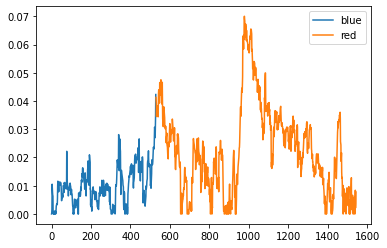

In [7]:
sns.lineplot(x = [i for i in range(len(stat_trajectory))], y=stat_trajectory, hue=cusum.breakpoints)